In [1]:
from lifelines import CoxPHFitter
import pandas as pd

In [2]:
df   = pd.read_csv("Telco-Customer-Churn.csv")
df_r = df.loc[:,['tenure','Churn','gender','Partner','Dependents','PhoneService','MonthlyCharges','SeniorCitizen','StreamingTV']]
df_r.head()

,tenure,Churn,gender,Partner,Dependents,PhoneService,MonthlyCharges,SeniorCitizen,StreamingTV
0,1,No,Female,Yes,No,No,29.85,0,No
1,34,No,Male,No,No,Yes,56.95,0,No
2,2,Yes,Male,No,No,Yes,53.85,0,No
3,45,No,Male,No,No,No,42.30,0,No
4,2,Yes,Female,No,No,Yes,70.70,0,No


In [3]:
## Create dummy variables
df_dummy = pd.get_dummies(df_r,drop_first = True)
df_dummy.head()

,tenure,MonthlyCharges,SeniorCitizen,Churn_Yes,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,StreamingTV_No internet service,StreamingTV_Yes
0,1,29.85,0,0,0,1,0,0,0,0
1,34,56.95,0,0,1,0,0,1,0,0
2,2,53.85,0,1,1,0,0,1,0,0
3,45,42.30,0,0,1,0,0,0,0,0
4,2,70.70,0,1,0,0,0,1,0,0


In [4]:
## Using Cox Proportional Hazards model
cph = CoxPHFitter() ## Instantiate the class  to create a cph object

cph.fit(df_dummy,'tenure', event_col='Churn_Yes') ## Fit the data to train the model


<lifelines.CoxPHFitter: fitted with 7043 total observations, 5174 right-censored observations>

In [5]:

cph.print_summary()

<lifelines.CoxPHFitter: fitted with 7043 total observations, 5174 right-censored observations>
             duration col = 'tenure'
                event col = 'Churn_Yes'
      baseline estimation = breslow
   number of observations = 7043
number of events observed = 1869
   partial log-likelihood = -15182.39
         time fit was run = 2023-04-11 09:57:30 UTC

---
                                  coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                               
MonthlyCharges                   -0.01       0.99       0.00            -0.01            -0.01                 0.99                 0.99
SeniorCitizen                     0.40       1.49       0.06             0.29             0.50                 1.33                 1.66
gender_Male                      -0.01       0.99       0.05            -0.10             0.08                 0.90                 1.08
Partner_Yes                      -0.81       0.45       0.05            -0.92            -0.70                 0.40                 0.50
Dependents_Yes                   -0.36       0.70       0.07            -0.49            -0.22                 0.61                 0.80
PhoneService_Yes                  0.69       2.00       0.10             0.49             0.90                 1.63                 2.45
StreamingTV_No internet service  -2.10       0.12       0.13            -2.36            -1.84                 0.09                 0.16
StreamingTV_Yes                  -0.19       0.83       0.06            -0.31            -0.07                 0.73                 0.93

                                  cmp to      z      p   -log2(p)
covariate                                                        
MonthlyCharges                      0.00  -6.13 <0.005      30.06
SeniorCitizen                       0.00   7.16 <0.005      40.15
gender_Male                         0.00  -0.23   0.82       0.29
Partner_Yes                         0.00 -14.93 <0.005     164.98
Dependents_Yes                      0.00  -5.21 <0.005      22.37
PhoneService_Yes                    0.00   6.65 <0.005      34.96
StreamingTV_No internet service     0.00 -15.79 <0.005     184.09
StreamingTV_Yes                     0.00  -3.10 <0.005       9.03
---
Concordance = 0.71
Partial AIC = 30380.78
log-likelihood ratio test = 941.30 on 8 df
-log2(p) of ll-ratio test = 654.95

<AxesSubplot:xlabel='log(HR) (95% CI)'>

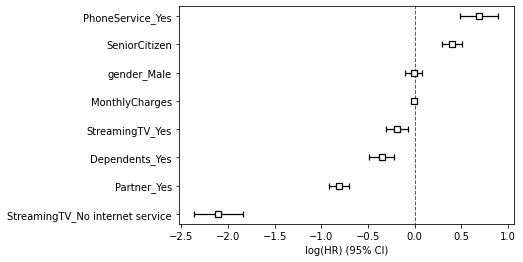

In [6]:
cph.plot()

In [7]:
tr_rows = df_dummy.iloc[5:10,1:]
tr_rows

,MonthlyCharges,SeniorCitizen,Churn_Yes,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,StreamingTV_No internet service,StreamingTV_Yes
5,99.65,0,1,0,0,0,1,0,1
6,89.10,0,0,1,0,1,1,0,1
7,29.75,0,0,0,0,0,0,0,0
8,104.80,0,1,0,1,0,1,0,1
9,56.15,0,0,1,0,1,1,0,0


<AxesSubplot:>

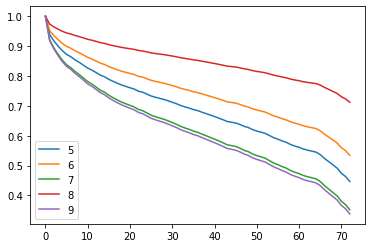

In [8]:
## Lets predict the survival curve for the selected customers.
## Customers can be identified with the help of the number mentioned against each curve.

cph.predict_survival_function(tr_rows).plot()

In [9]:
df_dummy[5:10]

,tenure,MonthlyCharges,SeniorCitizen,Churn_Yes,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,StreamingTV_No internet service,StreamingTV_Yes
5,8,99.65,0,1,0,0,0,1,0,1
6,22,89.10,0,0,1,0,1,1,0,1
7,10,29.75,0,0,0,0,0,0,0,0
8,28,104.80,0,1,0,1,0,1,0,1
9,62,56.15,0,0,1,0,1,1,0,0
